Units used: GeV for masses, s for time, cm for distances

In [1]:
import os
import glob
import importlib
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.lines as mlines


import sys
sys.path.insert(1, '/home/stasya/prj/alps-running/TdAlps-Internal/')
import TdAlps
from collections import OrderedDict

import scipy.integrate as integrate
import scipy.optimize as optimize

import csv

In [12]:
def importNotebook(name):
    
    currentDir=os.getcwd()
    notebookDir=os.path.dirname(name)
    os.chdir(notebookDir)
    notebookName=os.path.basename(name).split('.')[0]
    module = importlib.import_module(f"ipynb.fs.full.{notebookName}")
    
    globals().update(vars(module))

In [13]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_base.ipynb")

/home/stasya/prj/alps/Python/ALPs_base.ipynb:605: ComplexWarning: Casting complex values to real discards the imaginary part
  "\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:645: ComplexWarning: Casting complex values to real discards the imaginary part
  "    return float(gamma)\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:658: ComplexWarning: Casting complex values to real discards the imaginary part
  "    alphaEM = readAlphaEM(coeffs)\n",
/home/stasya/prj/alps/Python/ALPs_base.ipynb:632: ComplexWarning: Casting complex values to real discards the imaginary part
  {


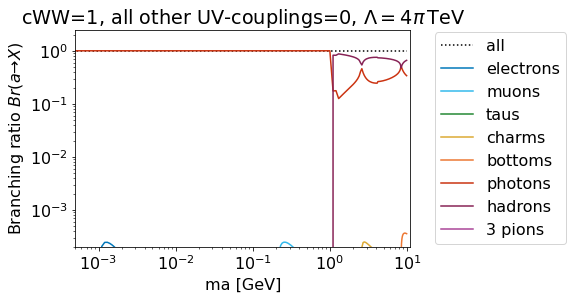

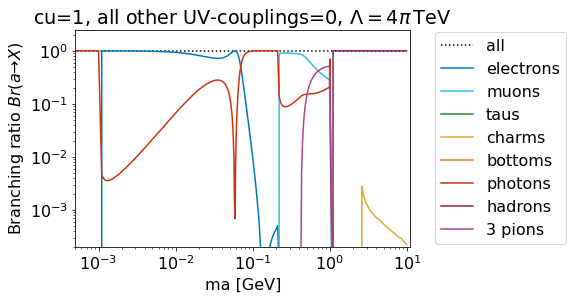

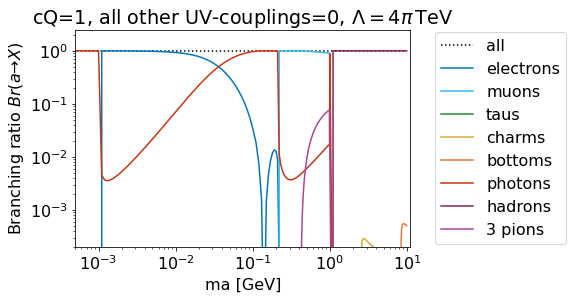

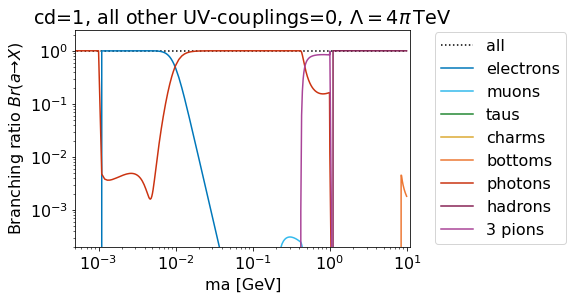

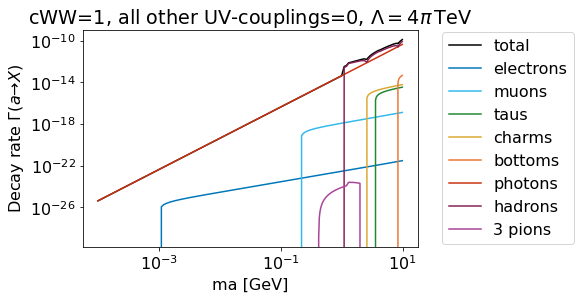

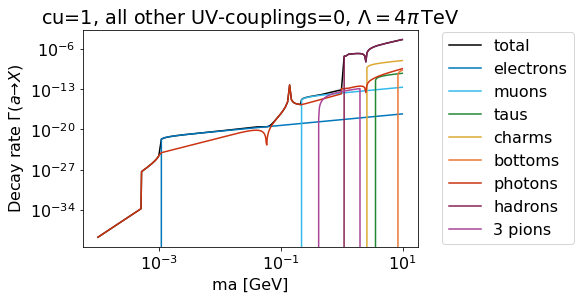

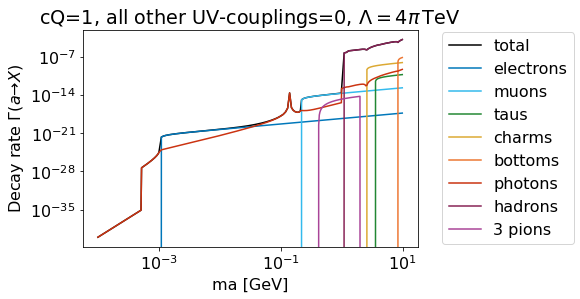

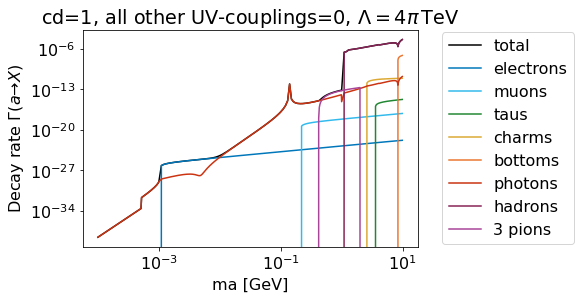

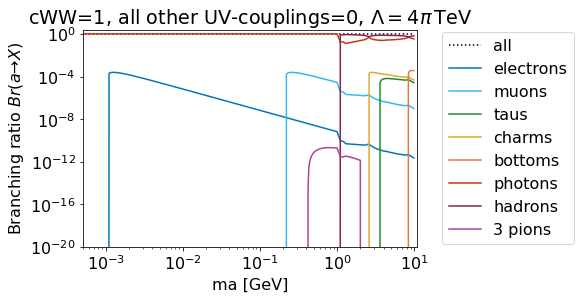

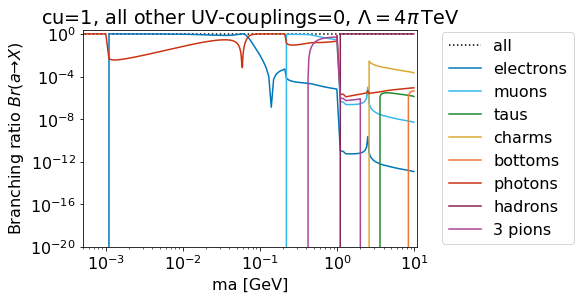

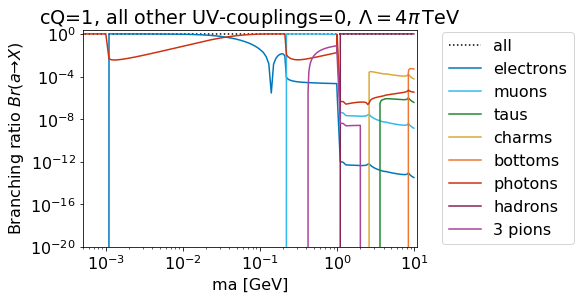

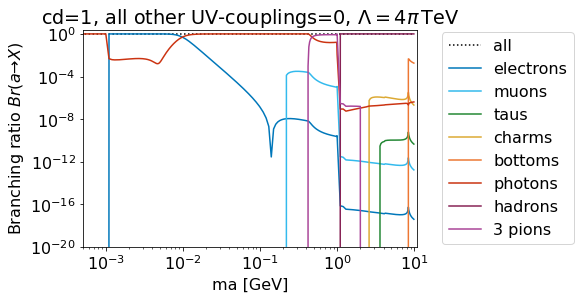

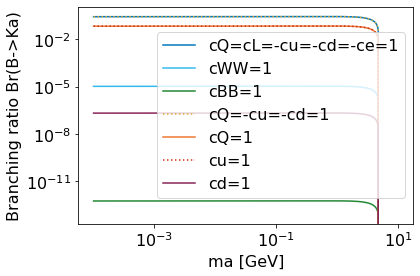

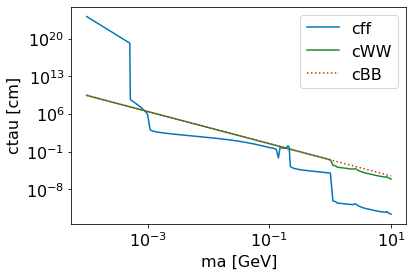

In [14]:
importNotebook("/home/stasya/prj/alps/Python/ALPs_BRs.ipynb")

In [5]:
#Plotting settings

font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [6]:
constants={
    'InvGeVtocm': 1/(5.06 * 10**(13))
}

In [7]:
sm={
    'GF': 1.166*10**(-5),
    'sw': np.sqrt(0.231),
    'hbar': 6.582*10**(-25),
    'c': 3*10**10,
    'alpha': 1/137,
    'Vtb': 0.999,
    'Vts': 0.0404,
    'Xt': 1.469,
    'BrBtoKnunu+': 4.5*10**(-6),
    'NBBBaBar': 471*10**6,
    'NBBBelleII': 5*10**10,
    'me': 0.000511,
    'mmu': 0.1056,
    'mtau': 1.777,
    'mu': 2.2/1000,
    'md': 4.7/1000,
    'ms': 95/1000,
    'mc': 1.275,
    'mb': 4.18,
    'mt': 173,
    'mZ': 91.19,
    'mB+': 5.279,
    'mK+': 0.494,
    'mpi+': 0.13957039,
    'tauB+': 1.638*10**(-12),
    'ctauB+': 3 * 10**10 * 1.638*10**(-12),
    'GammaB+': 6.582*10**(-25)/(10**(-12) * 1.638)
}

In [8]:
BelleIIparams={
    'gammaBoostB': 1.03029,
    'RCDC': 60, #cm
    'thetaCDCMin': np.deg2rad(17),
    'thetaCDCMax': np.deg2rad(150),
    'dres': 0.9,
    'NBBelleII': 5*10**10
}

In [9]:
def f(Lambda):
    return Lambda/(4 * np.pi)

In [10]:
def fz(t):
    tplus = (sm['mB+']+sm['mK+'])**2
    tminus = (sm['mB+']-sm['mK+'])**2
    tzero = tplus * (1-np.sqrt(1-tminus/tplus))
    return (np.sqrt(tplus-t) - np.sqrt(tplus-tzero))/(np.sqrt(tplus-t) + np.sqrt(tplus-tzero))

def formFactorFplusBplus(qsqr):
    tmp = 0.329
    tmp += -0.876 * (fz(qsqr) - fz(0))
    tmp += 0.006 * (fz(qsqr) - fz(0))**2
    tmp = tmp/(1-qsqr/5.325**2)
    return tmp

def formFactorFzeroBplus(qsqr):
    tmp = 0.329
    tmp += 0.195 * (fz(qsqr) - fz(0))
    tmp += -0.446 * (fz(qsqr) - fz(0))**2
    tmp = tmp/(1-qsqr/5.54**2)
    return tmp

## based on https://github.com/rrschaefer/alps (formulas taken from 2012.12272 and 1708.00443)

### Alps running implemented in https://github.com/TdAlps

In [15]:
readCgg(testCoeff)

NameError: name 'testCoeff' is not defined

In [60]:
readAlphaEM(testCoeff)

(0.009355856842486333+0j)

In [61]:
printLowScaleCoef(testCoeff)

readCuu = (-1.8074145610334433+1.236002685836065e-23j)
 readCcc = (-1.8074145610334433+1.236002685836065e-23j)
 readCdd = (-1.9849201641117094+1.6989130428214282e-21j)
 readCss = (-1.9848961320794243-3.3757792145663177e-21j)
 readCbb = (-1.9702061679936684+1.2352574450883817e-23j)



### ALP and B-> Ka decay rates

In [26]:
BrBtoKaplus(2, 1, 10**3)

721645.0581140692

In [27]:
BrBtoKaplusMyCheck(0.3, 1, 10**3)

764400.4958397369

In [28]:
Gammaa(3, 1, 0, 0, 10**3)

<ipython-input-19-de56bdf3d9c0>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


2.5384445624301206e-05

### ALP branching ratios

In [29]:
# def brsALP(cQ,cu,cd,cL,ce,cGG,cWW,cBB,title,Lambda,br=True):
#     with HiddenPrints():
#         HC = OrderedDict()
#         HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
#         HC['u'] = np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
#         HC['d'] = np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
#         HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
#         HC['e'] = np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
#         HC['GG'] = cGG
#         HC['WW'] = cWW
#         HC['BB'] = cBB

#         maList = list((i*10**(exp-2) for exp in range(-3, 2) for i in range(10, 100)))
#         brs = [[],[],[],[],[],[],[],[]]
#         for ma in maList:
#             lscs = TdAlps.RunRotateMatchRun(HC, Lambda, ma, 3)
#             brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
#             brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda))
#             try:
#                 ctautau = readCtautau(lscs)
#             except IndexError:
#                 ctautau = 0
#             brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],Lambda))
#             try:
#                 ccc = readCcc(lscs)
#             except IndexError:
#                 ccc = 0
#             brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],Lambda))
#             try:
#                 cbb = readCbb(lscs)
#             except IndexError:
#                 cbb = 0
#             brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],Lambda))
#             brs[5].append(Gammaatogamgam(ma,lscs,Lambda))
#             brs[6].append(Gammaatohad(ma,lscs,Lambda))
#             brs[7].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]+brs[6][-1])
#             if (br):
#                 brs[0][-1] = brs[0][-1]/brs[7][-1]
#                 brs[1][-1] = brs[1][-1]/brs[7][-1]
#                 brs[2][-1] = brs[2][-1]/brs[7][-1]
#                 brs[3][-1] = brs[3][-1]/brs[7][-1]
#                 brs[4][-1] = brs[4][-1]/brs[7][-1]
#                 brs[5][-1] = brs[5][-1]/brs[7][-1]
#                 brs[6][-1] = brs[6][-1]/brs[7][-1]

#         fig, ax = plt.subplots() 
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#         ax.set_xlabel('ma [GeV]')
#         if (br):
#             ax.set_ylim([2*10**-4,2.5])
#             ax.set_xlim([5*10**-4,11])
#             ax.set_ylabel('Branching ratio Br(a->X)')
#             ax.plot([maList[0],maList[-1]],[1,1],label='all',ls=':') 
#         else:
#             ax.plot(maList,brs[7],label='total') 
#             ax.set_ylabel('Decay rate Gamma(a->X)')
#         ax.plot(maList,brs[0],label='electrons') 
#         ax.plot(maList,brs[1],label='muons') 
#         ax.plot(maList,brs[2],label='taus') 
#         ax.plot(maList,brs[3],label='charms') 
#         ax.plot(maList,brs[4],label='bottoms') 
#         ax.plot(maList,brs[5],label='photons') 
#         ax.plot(maList,brs[6],label='hadrons') 
#         ax.legend()
#         plt.title(title)
#     plt.show()

In [30]:
def brsALP(cQ,cu,cd,cL,ce,cGG,cWW,cBB,title,Lambda,br=True):
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB

        maList = list((i*10**(exp-2) for exp in range(-3, 2) for i in range(10, 100)))
        brs = [[],[],[],[],[],[],[],[]]
        for ma in maList:
            lscs = TdAlps.RunRotateMatchRun(HC, Lambda, ma, 3)
            brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
            brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda))
            try:
                ctautau = readCtautau(lscs)
            except IndexError:
                ctautau = 0
            brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],Lambda))
            try:
                ccc = readCcc(lscs)
            except IndexError:
                ccc = 0
            brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],Lambda))
            try:
                cbb = readCbb(lscs)
            except IndexError:
                cbb = 0
            brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],Lambda))
            brs[5].append(Gammaatogamgam(ma,lscs,Lambda))
            brs[6].append(Gammaatohad(ma,lscs,Lambda))
            brs[7].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]+brs[6][-1])
            if (br and brs[7][-1] != 0):
                brs[0][-1] = brs[0][-1]/brs[7][-1]
                brs[1][-1] = brs[1][-1]/brs[7][-1]
                brs[2][-1] = brs[2][-1]/brs[7][-1]
                brs[3][-1] = brs[3][-1]/brs[7][-1]
                brs[4][-1] = brs[4][-1]/brs[7][-1]
                brs[5][-1] = brs[5][-1]/brs[7][-1]
                brs[6][-1] = brs[6][-1]/brs[7][-1]

        fig, ax = plt.subplots(figsize=(9, 7)) 
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('ma [GeV]')
        if (br):
            ax.set_ylim([1*10**-6,2.5])
            ax.set_xlim([5*10**-4,11])
            ax.set_ylabel('Branching ratio Br(a->X)')
            ax.plot([maList[0],maList[-1]],[1,1],label='all',ls=':') 
        else:
            ax.plot(maList,brs[7],label='total') 
            ax.set_ylabel('Decay rate Gamma(a->X)')
        ax.plot(maList,brs[0],label='electrons') 
        ax.plot(maList,brs[1],label='muons') 
        ax.plot(maList,brs[2],label='taus') 
        ax.plot(maList,brs[3],label='charms') 
        ax.plot(maList,brs[4],label='bottoms') 
        ax.plot(maList,brs[5],label='photons') 
        ax.plot(maList,brs[6],label='hadrons') 
        ax.legend(bbox_to_anchor=(1.05, 1))
        plt.title(title)
    plt.show()
    
    return fig

decays under consideration encoded as
0: e
1: mu
2: tau
3: charm
4: bottom
5: photon
6: hadron

In [31]:
def brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,lscsPassed=None):
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB

        brs = [[],[],[],[],[],[],[],[]]
        
        if (lscsPassed is not None):
            lscs=lscsPassed
        else:
            lscs = TdAlps.RunRotateMatchRun(HC, Lambda, ma, 3)
        
        brs[0].append(Gammaatoll(ma,readCee(lscs),sm['me'],Lambda))
        brs[1].append(Gammaatoll(ma,readCmumu(lscs),sm['mmu'],Lambda))
        try:
            ctautau = readCtautau(lscs)
        except IndexError:
            ctautau = 0
        brs[2].append(Gammaatoll(ma,ctautau,sm['mtau'],Lambda))
        try:
            ccc = readCcc(lscs)
        except IndexError:
            ccc = 0
        brs[3].append(Gammaatoqq(ma,ccc,sm['mc'],Lambda))
        try:
            cbb = readCbb(lscs)
        except IndexError:
            cbb = 0
        brs[4].append(Gammaatoqq(ma,cbb,sm['mb'],Lambda))
        brs[5].append(Gammaatogamgam(ma,lscs,Lambda))
        brs[6].append(Gammaatohad(ma,lscs,Lambda))
        brs[7].append(brs[0][-1]+brs[1][-1]+brs[2][-1]+brs[3][-1]+brs[4][-1]+brs[5][-1]+brs[6][-1])
        
    #print(lscs)
    ctauAlp=constants['InvGeVtocm']/brs[7][-1]

    return [brs[finalStateCode][-1]/brs[7][-1],ctauAlp]

In [32]:
brALPtoOneFinalState(1,5,1,-1,-1,1,-1,0,0,0,1000)

<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


[0.19259441829593593, 8.448783165873305e-06]

<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-19-de56bdf3d9c0>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


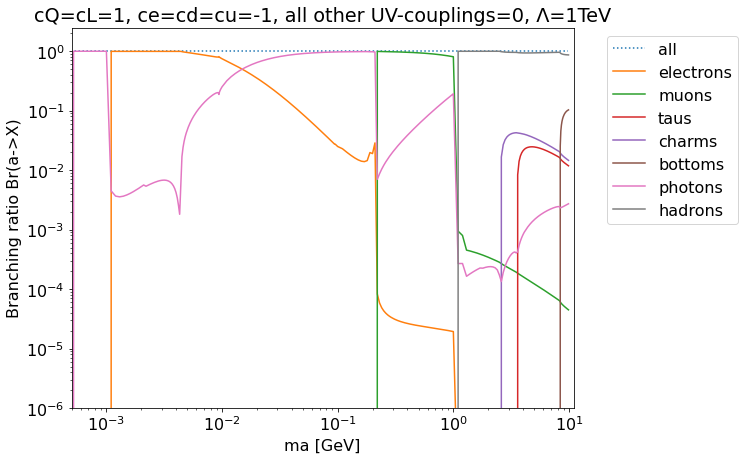

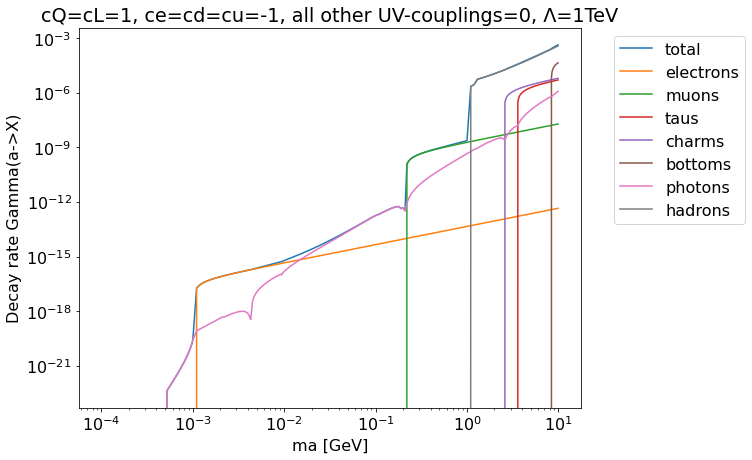

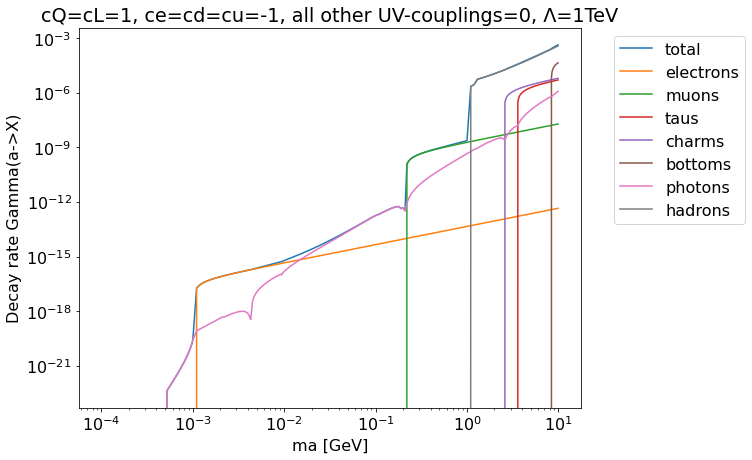

In [33]:
brsALP(1,-1,-1,1,-1,0,0,0,"cQ=cL=1, ce=cd=cu=-1, all other UV-couplings=0, \u039B=1TeV",1000)
brsALP(1,-1,-1,1,-1,0,0,0,"cQ=cL=1, ce=cd=cu=-1, all other UV-couplings=0, \u039B=1TeV",1000,br=False)

<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-19-de56bdf3d9c0>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


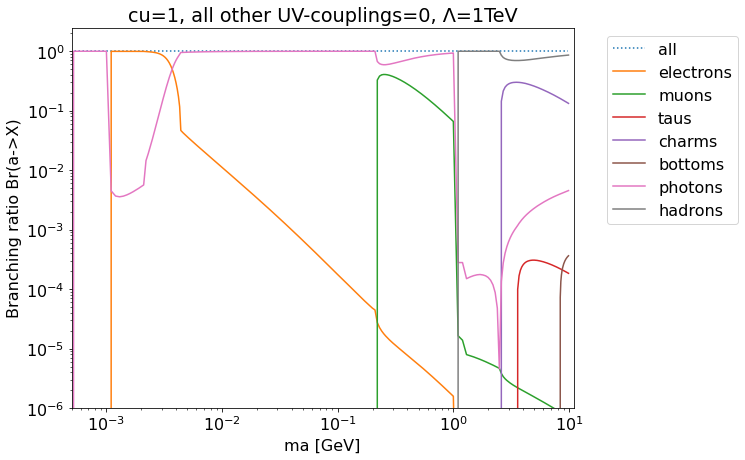

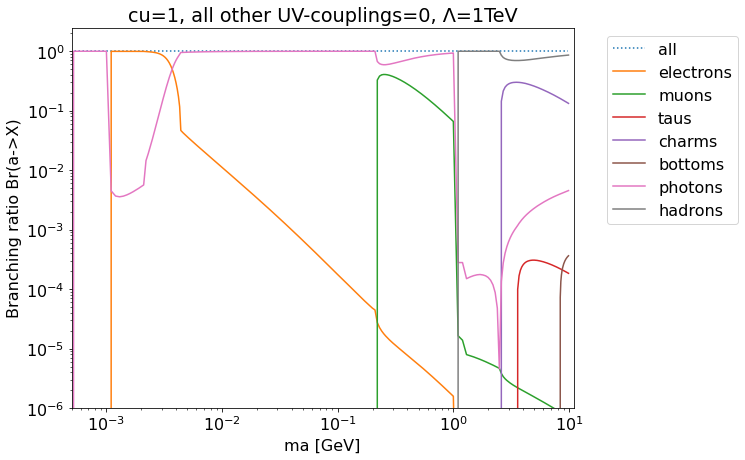

In [77]:
brsALP(0,1,0,0,0,0,0,0,"cu=1, all other UV-couplings=0, \u039B=1TeV",10**3)

In [ ]:
brsALP(1,-1,-1,0,0,0,0,0,"cQ=1, cd=-1=cu, all other UV-couplings=0, \u039B=1TeV",1000)
brsALP(1,-1,-1,0,0,0,0,0,"cQ=1, cd=-1=cu, all other UV-couplings=0, \u039B=1TeV",1000,br=False)

## Integral over detector

In [57]:
def gammaBeta(gammaParent,mParent,ma):
    return np.sqrt(gammaParent**2 * (sm['mB+']**2-sm['mK+']**2+ma**2)**2/(4*sm['mB+']**2*ma**2)-1)
    
def gammaBetaAlp(ma):
    return gammaBeta(BelleIIparams['gammaBoostB'],sm['mB+'],ma)

In [58]:
def thetaMinBoost(thetaMin,r,ctau,gammaBeta):
    return np.arctan(r/(r/np.tan(thetaMin) - gammaBeta * ctau))

def thetaMaxBoost(thetaMin,r,ctau,gammaBeta):
    return np.pi+np.arctan(-r/(-r/np.tan(thetaMin) + gammaBeta * ctau))

def geomInt(thetaMin,thetaMax,dmin,dmax,ctau,gammaBeta):
    return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
            * (np.exp(-dmin/(np.sin(theta) * gammaBeta * ctau)) * (dmin**2 + 2 * gammaBeta * ctau * np.sin(theta) \
            * (dmin + gammaBeta * ctau * np.sin(theta)))\
            - np.exp(-dmax/(np.sin(theta) * gammaBeta * ctau)) * (dmax**2 + 2 * gammaBeta * ctau * np.sin(theta) \
            * (dmax + gammaBeta * ctau * np.sin(theta))))\
            , thetaMin, thetaMax)[0]
    
def geomIntBelleIICDC(thetaMin,thetaMax,dmin,dmax,ctau,gammaBeta):
    return np.heaviside(np.real(BelleIIparams['RCDC']/np.tan(thetaMin)-BelleIIparams['gammaBoostB'] * sm['ctauB+']),1)\
            * geomInt(thetaMin,thetaMax,dmin,dmax,ctau,gammaBeta)
                                                

In [ ]:
geomInt(np.deg2rad(17),np.deg2rad(150),0.9,1.1,0.5,1.7)

In [ ]:
geomIntBelleIICDC(np.deg2rad(17),np.deg2rad(150),0.9,60,0.5,1.7)

In [ ]:
thetaMinBoost(np.deg2rad(17),0.9,0.5,1.7)

In [ ]:
thetaMaxBoost(np.deg2rad(17),0.9,0.5,1.7)

# Number of signal events

In [59]:
BelleIIparams={
    'gammaBoostB': 1.03029,
    'RCDC': 60, #cm
    'thetaCDCMin': np.deg2rad(17),
    'thetaCDCMax': np.deg2rad(150),
    'dres': 0.9,
    'NBBelleII': 5*10**10
}

In [60]:
def nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda):
    with HiddenPrints():
        HC = OrderedDict()
        HC['Q'] = np.array([[cQ,0,0],[0,cQ,0],[0,0,cQ]])
        HC['u'] = np.array([[cu,0,0],[0,cu,0],[0,0,cu]])
        HC['d'] = np.array([[cd,0,0],[0,cd,0],[0,0,cd]])
        HC['L'] = np.array([[cL,0,0],[0,cL,0],[0,0,cL]])
        HC['e'] = np.array([[ce,0,0],[0,ce,0],[0,0,ce]])
        HC['GG'] = cGG
        HC['WW'] = cWW
        HC['BB'] = cBB
        
        lscsTmp = TdAlps.RunRotateMatchRun(HC, Lambda, sm['mB+'], 3)
        
        cbs=readCbs(lscsTmp)#getCbs(cff, cWW, cBB, Lambda, sm['mB+'])
        
#     print("BR(B-> K+ a)= ",BrBtoKaplus(ma, cbs, Lambda))    
    
#     #rewrite brALPtoOneFinalState such that last agr can be not a None 
#     print("BR(a->final)= ",brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0])
    
#     print([thetaMinBoost(BelleIIparams['thetaCDCMin'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),thetaMaxBoost(BelleIIparams['thetaCDCMax'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),BelleIIparams['dres'],BelleIIparams['RCDC']\
#     ,brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[1],gammaBetaAlp(ma)])
    
#     print(geomIntBelleIICDC(thetaMinBoost(BelleIIparams['thetaCDCMin'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),thetaMaxBoost(BelleIIparams['thetaCDCMax'],BelleIIparams['RCDC'],sm['ctauB+']\
#     ,gammaBetaAlp(ma)),BelleIIparams['dres'],BelleIIparams['RCDC']\
#     ,brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[1],gammaBetaAlp(ma)))
    
    return BelleIIparams['NBBelleII'] * BrBtoKaplus(ma, cbs, Lambda) \
    * brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[0]\
    * geomIntBelleIICDC(thetaMinBoost(BelleIIparams['thetaCDCMin'],BelleIIparams['RCDC'],sm['ctauB+']\
    ,gammaBetaAlp(ma)),thetaMaxBoost(BelleIIparams['thetaCDCMax'],BelleIIparams['RCDC'],sm['ctauB+']\
    ,gammaBetaAlp(ma)),BelleIIparams['dres'],BelleIIparams['RCDC']\
    ,brALPtoOneFinalState(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda,None)[1],gammaBetaAlp(ma))

In [61]:
nsignalBelleII(0.2,5,1,-1,-1,1,-1,0,0,0,1000)

<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


8422533143.760596

In [62]:
geomIntBelleIICDC(0.2968886712976968, 2.6185273888027787, 0.9, 60, 8.981305682648816e-06, 2.6080796979823226)

0.0

In [63]:

def nsignalAt95CLBelleIIAllcEqual(cff,ma,finalStateCode,Lambda,nOfEventsAt95CL):
    cQ=cL=cWW=cBB=cff
    ce=cd=cu=-cff
    cGG=0
    return nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda)-nOfEventsAt95CL

def nsignalAt95CLBelleIIcff(cff,ma,finalStateCode,Lambda,nOfEventsAt95CL):
    cGG=cWW=cBB=0
    cQ=cL=cff
    ce=cd=cu=-cff
    return nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda)-nOfEventsAt95CL


# def nsignalAt95CLBelleIIcWW(cWW,ma,finalStateCode,Lambda,nOfEventsAt95CL):
#     cQ=cL=cu=cd=ce=cGG=cBB=0
#     res = []
#     for i in np.asarray(cWW):
#         res_i = nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,i,cBB,Lambda)-nOfEventsAt95CL
#         res.append(res_i)
#     return np.array(res)

def nsignalAt95CLBelleIIcWW(cWW,ma,finalStateCode,Lambda,nOfEventsAt95CL):
    cQ=cL=cu=cd=ce=cGG=cBB=0
    return nsignalBelleII(ma,finalStateCode,cQ,cu,cd,cL,ce,cGG,cWW,cBB,Lambda)-nOfEventsAt95CL

In [64]:
nsignalAt95CLBelleIIAllcEqual(1,0.1,5,10**3,3)

<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


12186351608.862116

In [37]:
nsignalBelleII(0.1,5,1,-1,-1,1,-1,0,1,1,10**3)

<ipython-input-14-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


12186351611.862116

#### decays under consideration encoded as
0: e
1: mu
2: tau
3: charm
4: bottom
5: photon
6: hadron

In [78]:
couplingList

array([1.00000000e-06, 3.35981829e-06, 1.12883789e-05, 3.79269019e-05,
       1.27427499e-04, 4.28133240e-04, 1.43844989e-03, 4.83293024e-03,
       1.62377674e-02, 5.45559478e-02, 1.83298071e-01, 6.15848211e-01,
       2.06913808e+00, 6.95192796e+00, 2.33572147e+01, 7.84759970e+01,
       2.63665090e+02, 8.85866790e+02, 2.97635144e+03, 1.00000000e+04])

In [82]:
np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))

array([1.00000000e-06, 3.35981829e-06, 1.12883789e-05, 3.79269019e-05,
       1.27427499e-04, 4.28133240e-04, 1.43844989e-03, 4.83293024e-03,
       1.62377674e-02, 5.45559478e-02, 1.00000000e-01, 1.43844989e-01,
       1.83298071e-01, 2.06913808e-01, 2.97635144e-01, 4.28133240e-01,
       6.15848211e-01, 6.15848211e-01, 8.85866790e-01, 1.27427499e+00,
       1.83298071e+00, 2.06913808e+00, 2.63665090e+00, 3.79269019e+00,
       5.45559478e+00, 6.95192796e+00, 7.84759970e+00, 1.12883789e+01,
       1.62377674e+01, 2.33572147e+01, 2.33572147e+01, 3.35981829e+01,
       4.83293024e+01, 6.95192796e+01, 7.84759970e+01, 1.00000000e+02,
       2.63665090e+02, 8.85866790e+02, 2.97635144e+03, 1.00000000e+04])

In [83]:
couplingList=np.sort(np.append(np.logspace(-6, 4, 20),np.logspace(-1, 2, 20)))
def visibleBoundBelleIIcffEqcWWEqcBB(ma,finalStateCode,Lambda,nOfEventsAt95CL):
    nsignalAt95CLBelleIIAllcEqualEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIAllcEqual(\
                    coupling,ma,finalStateCode,Lambda,nOfEventsAt95CL)] for coupling in couplingList))
    
#     print([nsignalAt95CLBelleIIAllcEqual(couplingList[0],ma,finalStateCode,Lambda,nOfEventsAt95CL),\
#           nsignalAt95CLBelleIIAllcEqual(nsignalAt95CLBelleIIAllcEqualEstimate[\
#         np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0),0],ma,finalStateCode,Lambda,nOfEventsAt95CL)])
    
    if (np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0)==0):
        root1=root2=np.nan
    else:
        root1=optimize.brentq(nsignalAt95CLBelleIIAllcEqual, couplingList[0],\
            nsignalAt95CLBelleIIAllcEqualEstimate[np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0),0],\
                          args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))

        root2=optimize.brentq(nsignalAt95CLBelleIIAllcEqual,\
            nsignalAt95CLBelleIIAllcEqualEstimate[np.argmax(nsignalAt95CLBelleIIAllcEqualEstimate[:,1]>0),0],\
                              couplingList[-1], args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
    return [root1,root2]

def visibleBoundBelleIIcff(ma,finalStateCode,Lambda,nOfEventsAt95CL):
    nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
                                                Lambda,nOfEventsAt95CL)] for coupling in couplingList))
    if (np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0)==0):
        root1=root2=np.nan
    else:
        root1=optimize.brentq(nsignalAt95CLBelleIIcff, couplingList[0],\
            nsignalAt95CLBelleIIcffEstimate[np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0),0],\
                          args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))

        root2=optimize.brentq(nsignalAt95CLBelleIIcff,\
            nsignalAt95CLBelleIIcffEstimate[np.argmax(nsignalAt95CLBelleIIcffEstimate[:,1]>0),0],\
                              couplingList[-1], args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
    return [root1,root2]

def visibleBoundBelleIIcWW(ma,finalStateCode,Lambda,nOfEventsAt95CL):
    nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
                                                Lambda,nOfEventsAt95CL)] for coupling in couplingList))
#     print(nsignalAt95CLBelleIIcWWEstimate)
    if (np.argmax(nsignalAt95CLBelleIIcWWEstimate[:,1]>0)==0):
        root1=root2=np.nan
    else:
        root1=optimize.brentq(nsignalAt95CLBelleIIcWW, couplingList[0],\
            nsignalAt95CLBelleIIcWWEstimate[np.argmax(nsignalAt95CLBelleIIcWWEstimate[:,1]>0),0],\
                          args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))

        root2=optimize.brentq(nsignalAt95CLBelleIIcWW,\
            nsignalAt95CLBelleIIcWWEstimate[np.argmax(nsignalAt95CLBelleIIcWWEstimate[:,1]>0),0],\
                              couplingList[-1], args = (ma,finalStateCode,Lambda,nOfEventsAt95CL))
    return [root1,root2]
    

In [84]:
visibleBoundBelleIIcWW(1,5,10**3,3)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

[0.00945678668506935, 0.33908459210026914]

In [40]:
# visibleBoundBelleIIcffEqcWWEqcBB(0.05,5,10**3,3)

In [41]:
visibleBoundBelleIIcff(0.01,5,10**3,3)

<ipython-input-38-d5f8338667dc>:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
<ipython-input-14-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-26-1f1779c84ac1>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
<ipython-input-26-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

[0.5337758598739378, 617.7099326649785]

In [93]:
#masslist= [0.05, 0.05, 0.1, 0.2, 0.3, 0.5, 1., 2., 4.]
masslist=np.sort(np.append(np.logspace(-2, 0, 25),[0.09, 0.101, 0.43, 0.47,0.55,\
                                                   0.95, 1, 1.5, 2, 2.5, 3, 3.2, 3.5, 4,\
                                                   0.0935, 0.095, 0.63, 0.65]))
particleCodes=[*range(0,7,1)]

In [94]:
masslist

array([0.01      , 0.01211528, 0.01467799, 0.01778279, 0.02154435,
       0.02610157, 0.03162278, 0.03831187, 0.04641589, 0.05623413,
       0.06812921, 0.08254042, 0.09      , 0.0935    , 0.095     ,
       0.1       , 0.101     , 0.12115277, 0.14677993, 0.17782794,
       0.21544347, 0.26101572, 0.31622777, 0.38311868, 0.43      ,
       0.46415888, 0.47      , 0.55      , 0.56234133, 0.63      ,
       0.65      , 0.68129207, 0.82540419, 0.95      , 1.        ,
       1.        , 1.5       , 2.        , 2.5       , 3.        ,
       3.2       , 3.5       , 4.        ])

### mapping bounds over masses and final states

In [95]:
listVisibleBoundBelleIIcffEqcWWEqcBB=[]
for mass in masslist:
    listForFixedMass=[]
    for particle in particleCodes:
        listForFixedMass.append(visibleBoundBelleIIcffEqcWWEqcBB(mass,particle,10**3,3))
    listVisibleBoundBelleIIcffEqcWWEqcBB.append(listForFixedMass)
arrayVisibleBoundBelleIIcffEqcWWEqcBB=np.array(listVisibleBoundBelleIIcffEqcWWEqcBB)

<ipython-input-83-f7ef24db5db7>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIAllcEqualEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIAllcEqual(\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau

In [96]:
listVisibleBoundBelleIIcff=[]
for mass in masslist:
    listForFixedMass=[]
    for particle in particleCodes:
        listForFixedMass.append(visibleBoundBelleIIcff(mass,particle,10**3,3))
    listVisibleBoundBelleIIcff.append(listForFixedMass)
arrayVisibleBoundBelleIIcff=np.array(listVisibleBoundBelleIIcff)

<ipython-input-83-f7ef24db5db7>:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

In [97]:
visibleBoundBelleIIcWW(0.021544346900318832,5,10**3,3)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

[2.7306364317347676, 1120.0072212236566]

In [98]:
listVisibleBoundBelleIIcWW=[]
for mass in masslist:
    listForFixedMass=[]
    for particle in particleCodes:
#         print(mass,particle)
        listForFixedMass.append(visibleBoundBelleIIcWW(mass,particle,10**3,3))
    listVisibleBoundBelleIIcWW.append(listForFixedMass)
arrayVisibleBoundBelleIIcWW=np.array(listVisibleBoundBelleIIcWW)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (

In [99]:
arrayVisibleBoundBelleIIcWW

array([[[3.68139745e+01, 4.34368785e+03],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [8.62074823e+00, 5.46700333e+03],
        [           nan,            nan]],

       [[2.91275323e+01, 2.86991397e+03],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [6.46786535e+00, 3.68059137e+03],
        [           nan,            nan]],

       [[2.30840060e+01, 1.89144023e+03],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [           nan,            nan],
        [4.85219617e+00, 2.47672980e+03],
        [           nan,            nan]],

       [[1.83556044e+01, 1.24299252e+03],
        [           nan,            nan],
        [           nan,    

In [100]:
listVisibleBoundBelleIIcff

[[[0.4659577956430142, 626.8647898574694],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.5337758598739378, 617.7099326649785],
  [nan, nan]],
 [[0.38484809906011513, 466.0503434429573],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.4091943920750141, 462.92427692155775],
  [nan, nan]],
 [[0.31712742150567375, 344.67624531732076],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.3186078181486985, 344.497294876674],
  [nan, nan]],
 [[0.25995738473913094, 252.00605570223004],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.2482976680524717, 253.3230831090265],
  [nan, nan]],
 [[0.2118598416620019, 181.92573080443825],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.19293031663323051, 183.9110714000713],
  [nan, nan]],
 [[0.17167821581807433, 129.6940529392911],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [0.1492593057867047, 131.86517307651067],
  [nan, nan]],
 [[0.1383856181774482, 91.37994231442745],
  [nan

In [101]:
listVisibleBoundBelleIIcWW

[[[36.8139745010763, 4343.687850413027],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [8.620748230910424, 5467.003330541351],
  [nan, nan]],
 [[29.12753230567646, 2869.9139659084444],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [6.467865350807522, 3680.591369096682],
  [nan, nan]],
 [[23.084006032477163, 1891.4402339142935],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [4.852196165081788, 2476.7298040572764],
  [nan, nan]],
 [[18.35560436803222, 1242.9925205585168],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [3.639988622426749, 1665.879519619873],
  [nan, nan]],
 [[14.653675353493771, 814.1159220443235],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [2.7306364317347676, 1120.0072212236566],
  [nan, nan]],
 [[11.764599383601604, 531.0678816293151],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [nan, nan],
  [2.0497344707002103, 752.6840014372358],
  [nan, nan]],
 [[9.523577251955164, 344.7272948364741],
  [nan, nan],
  [na

### saving bounds to files

In [102]:
np.save('output/visibleBoundBelleIIcffEqcWWEqcBB',arrayVisibleBoundBelleIIcffEqcWWEqcBB)
np.save('output/visibleBoundBelleIIcff',arrayVisibleBoundBelleIIcff)
np.save('output/visibleBoundBelleIIcWW',arrayVisibleBoundBelleIIcWW)

### importing bounds 

In [103]:
readArrayVisibleBoundBelleIIcffEqcWWEqcBB = np.load('output/visibleBoundBelleIIcffEqcWWEqcBB.npy')
readArrayVisibleBoundBelleIIcff = np.load('output/visibleBoundBelleIIcff.npy')
readArrayVisibleBoundBelleIIcWW = np.load('output/visibleBoundBelleIIcWW.npy')

In [39]:
readArrayVisibleBoundBelleIIcff.shape

(39, 7, 2)

In [40]:
BaBarBounds=genfromtxt('../ruth/BaBarBounds_readable.txt', delimiter='\t')

In [41]:
BaBarBounds

array([[5.00000000e-03, 7.16307062e-03, 7.20750867e-03, 1.16208117e+00],
       [5.00000000e-02, 7.15594174e-03, 7.19981710e-03, 1.27128077e+00],
       [7.00000000e-02, 7.15532580e-03, 7.19774495e-03, 1.13224621e+01],
       [1.00000000e-01, 7.16272331e-03, 7.19904662e-03, 1.26878923e+01],
       [2.00000000e-01, 7.26282833e-03, 7.22141189e-03, 1.24999149e+01],
       [2.50000000e-01, 7.10783030e-02, 7.15192563e-02, 1.15250012e+01],
       [3.00000000e-01, 7.73951764e-02, 7.78753180e-02, 1.25482859e+01],
       [5.00000000e-01, 7.50043832e-02, 7.54696930e-02, 1.21610126e+01],
       [1.00000000e+00, 6.68002835e-02, 6.72146969e-02, 1.08319123e+01],
       [2.00000000e+00, 5.90267085e-02, 5.93928964e-02, 9.57232110e+00],
       [3.00000000e+00, 3.46333364e-02, 3.48481936e-02, 5.61803961e+00],
       [4.00000000e+00, 4.08366737e-02, 4.10900149e-02, 6.62389037e+00]])

In [42]:
testcombinedx=np.append(masslist,np.flip(masslist))
testcombined=np.append(readArrayVisibleBoundBelleIIcWW[:,0,0],np.flip(readArrayVisibleBoundBelleIIcWW[:,0,1]))

### plots

#### decays under consideration encoded as
0: e
1: mu
2: tau
3: charm
4: bottom
5: photon
6: hadron

In [104]:
def plotBounds(boundsArray, particleCode, upper=False):
    if upper:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,1]]).T
    else:
        return np.vstack([np.array(masslist),boundsArray[:,particleCode,0]]).T

In [105]:
def stackBounds(xarray,arrSmattToLarge,arrLargeToSmall):
    combinedx=np.append(xarray,np.flip(xarray))
    combinedy=np.append(arrSmattToLarge,np.flip(arrLargeToSmall))
    
    return np.vstack([combinedx,combinedy]).T

In [106]:
def plotGen(inputarray,lineScatterFillORPolygon,color,linewidthORmarkersize,*args,**kwargs):
    
    data=inputarray[~np.isnan(inputarray[:,1])]
    
    if not args:
        alphaPoly=0.3
    else:
        alphaPoly=args[0]
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,0],data[:,1], color=color, alpha=1)
    if (lineScatterFillORPolygon=="oppacpolygon"):
        ax.fill(data[:,0],data[:,1], facecolor=color, alpha=alphaPoly,\
                edgecolor=color,linewidth=linewidthORmarkersize)
    if (lineScatterFillORPolygon=="nonfilledpolygon"):
        ax.fill(data[:,0],data[:,1], facecolor="none", edgecolor=color,\
                linewidth=linewidthORmarkersize, linestyle='-',**kwargs)

<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-19-de56bdf3d9c0>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


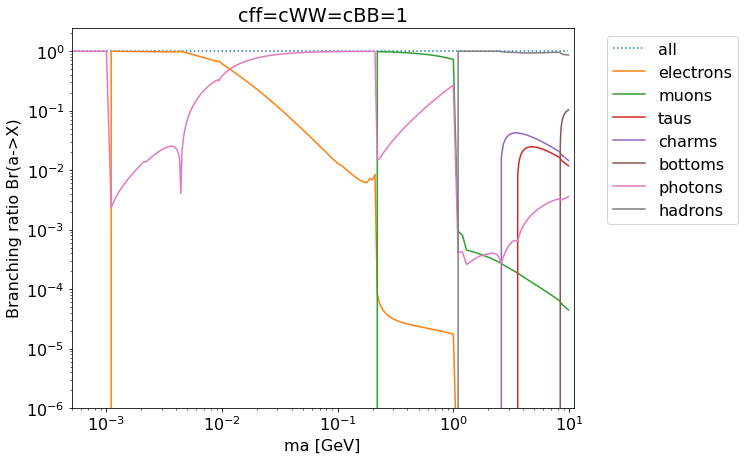

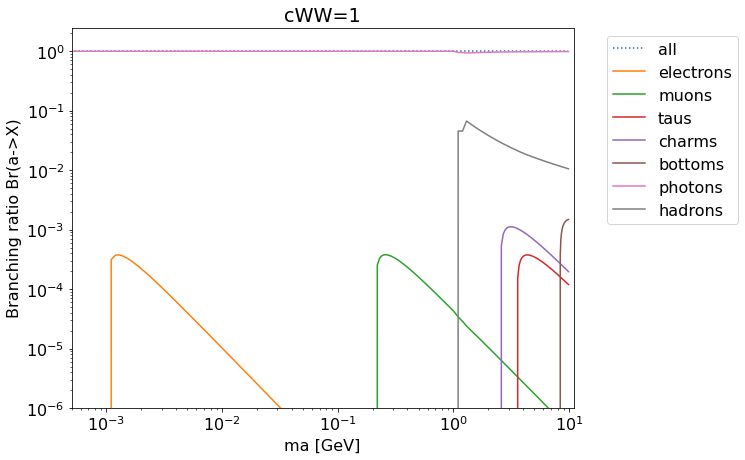

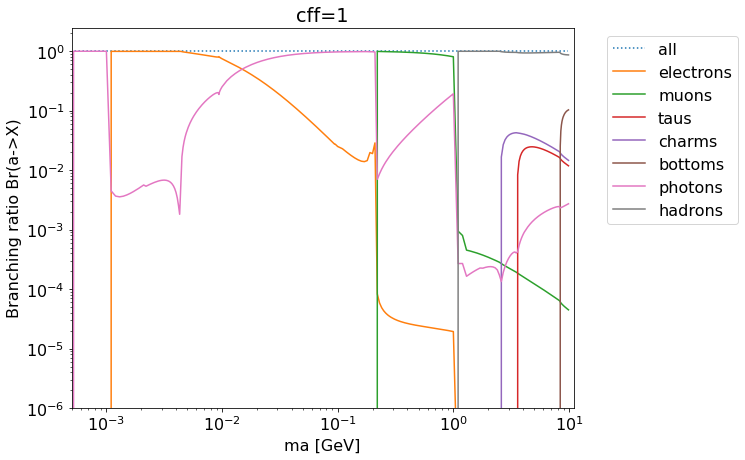

In [107]:
cffPlot=1
cWWPlot=1


figBRcffEqcWWEqcBB=brsALP(cffPlot,-cffPlot,-cffPlot,cffPlot,-cffPlot,0,cffPlot,cffPlot,\
                          'cff=cWW=cBB={}'.format(cffPlot),10**3)
figBRcffEqcWWEqcBB.savefig('plots/cff=cWW=cBB={}'.format(cffPlot), dpi=300, bbox_inches='tight')

figBRcWW=brsALP(0,0,0,0,0,0,cWWPlot,0,'cWW={}'.format(cWWPlot),10**3)
figBRcWW.savefig('plots/cWW={}'.format(cffPlot), dpi=300, bbox_inches='tight')

figBRcff=brsALP(cffPlot,-cffPlot,-cffPlot,cffPlot,-cffPlot,0,0,0,'cff={}'.format(cffPlot),10**3)
figBRcff.savefig('plots/cff={}'.format(cffPlot), dpi=300, bbox_inches='tight')


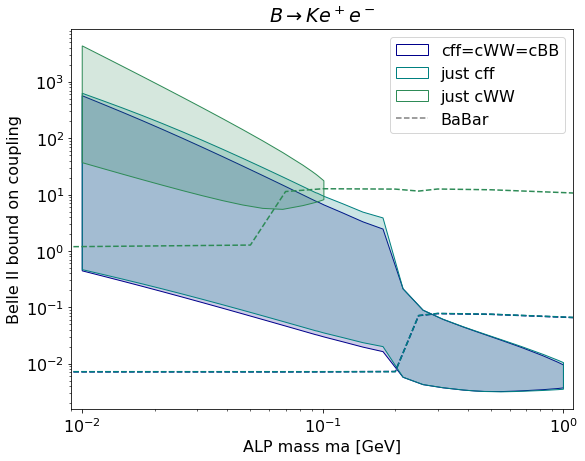

In [108]:
fig, ax = plt.subplots(figsize=(9, 7))

# ax.plot(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,0,0],label='cff=cWW=cBB',c="darkblue") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,0,1],c="darkblue")
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="darkblue", ls='--')

# ax.plot(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],label='just cff',c="teal") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcff[:,0,1],c="teal") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="teal", ls='-.')

# ax.plot(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],label='just cWW',c="mediumseagreen") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcWW[:,0,1],c="mediumseagreen") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,3],c="mediumseagreen", ls='--')


plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,0,0],\
                    readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,0,1]),"oppacpolygon","darkblue",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,0,0],\
                    readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,0,1]),"nonfilledpolygon","darkblue",1,\
                    label='cff=cWW=cBB')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="darkblue", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"oppacpolygon","teal",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,0,0],\
                    readArrayVisibleBoundBelleIIcff[:,0,1]),"nonfilledpolygon","teal",1,\
                    label='just cff')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="teal", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"oppacpolygon","seagreen",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,0,0],\
                    readArrayVisibleBoundBelleIIcWW[:,0,1]),"nonfilledpolygon","seagreen",1,
                    label='just cWW')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,3],c="seagreen", ls='--')


ax.set_title('$B\\rightarrow K e^+ e^-$')

ax.set_xlabel('ALP mass ma [GeV]')
ax.set_ylabel('Belle II bound on coupling')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 1.1)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='gray', linestyle='--',
                          markersize=15, label='BaBar')
handles.append(babar) 

ax.legend(handles=handles)



plt.savefig('plots/visibleBoundBelleII-electrons.png', dpi=300, bbox_inches='tight')

In [109]:
masslist

array([0.01      , 0.01211528, 0.01467799, 0.01778279, 0.02154435,
       0.02610157, 0.03162278, 0.03831187, 0.04641589, 0.05623413,
       0.06812921, 0.08254042, 0.09      , 0.0935    , 0.095     ,
       0.1       , 0.101     , 0.12115277, 0.14677993, 0.17782794,
       0.21544347, 0.26101572, 0.31622777, 0.38311868, 0.43      ,
       0.46415888, 0.47      , 0.55      , 0.56234133, 0.63      ,
       0.65      , 0.68129207, 0.82540419, 0.95      , 1.        ,
       1.        , 1.5       , 2.        , 2.5       , 3.        ,
       3.2       , 3.5       , 4.        ])

In [110]:
visibleBoundBelleIIcWW(0.0935,0,10**3,3)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

[7.285811014526801, 22.972960772215906]

In [111]:
visibleBoundBelleIIcffEqcWWEqcBB(0.95,0,10**3,3)

<ipython-input-83-f7ef24db5db7>:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIAllcEqualEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIAllcEqual(\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (gammaBeta * ctau

[0.0036281323287399463, 0.010557913762586135]

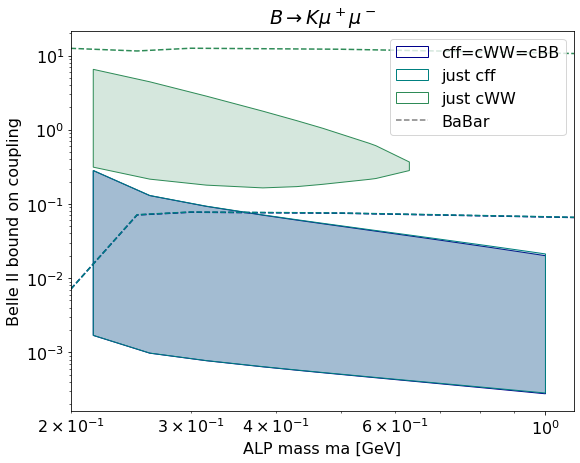

In [112]:
outputfig, ax = plt.subplots(figsize=(9, 7))

# ax.plot(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,1,0],label='cff=cWW=cBB',c="darkblue") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,1,1],c="darkblue") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="darkblue", ls='--')

# ax.plot(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],label='just cff',c="teal") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcff[:,1,1],c="teal") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="teal", ls='-.')

# ax.plot(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],label='just cWW',c="mediumseagreen") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcWW[:,1,1],c="mediumseagreen") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,3],c="mediumseagreen", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,1,0],\
                    readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,1,1]),"oppacpolygon","darkblue",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,1,0],\
                    readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,1,1]),"nonfilledpolygon","darkblue",1,\
                    label='cff=cWW=cBB')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="darkblue", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
                    readArrayVisibleBoundBelleIIcff[:,1,1]),"oppacpolygon","teal",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,1,0],\
                    readArrayVisibleBoundBelleIIcff[:,1,1]),"nonfilledpolygon","teal",1,\
                    label='just cff')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="teal", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],\
                    readArrayVisibleBoundBelleIIcWW[:,1,1]),"oppacpolygon","seagreen",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,1,0],\
                    readArrayVisibleBoundBelleIIcWW[:,1,1]),"nonfilledpolygon","seagreen",1,
                    label='just cWW')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,3],c="seagreen", ls='--')

ax.set_title('$B\\rightarrow K \\mu^+ \\mu^-$')

ax.set_xlabel('ALP mass ma [GeV]')
ax.set_ylabel('Belle II bound on coupling')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(2*10**-1, 1.1)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='gray', linestyle='--',
                          markersize=15, label='BaBar')
handles.append(babar) 

ax.legend(handles=handles)

plt.savefig('plots/visibleBoundBelleII-muons.png', dpi=300, bbox_inches='tight')

In [113]:
visibleBoundBelleIIcff(2,1,10**3,3)

<ipython-input-83-f7ef24db5db7>:23: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcffEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcff(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-19-de56bdf3d9c0>:109: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)


[nan, nan]

In [114]:
visibleBoundBelleIIcWW(0.63,1,10**3,3)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return 1/(4 * (gammaBeta * ctau)**2) * integrate.quad(lambda theta: (1/np.sin(theta)) \
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (s

[0.28186412099791874, 0.3675339850597292]

In [115]:
np.vstack([masslist,readArrayVisibleBoundBelleIIcWW[:,1,0]]).T

array([[0.01      ,        nan],
       [0.01211528,        nan],
       [0.01467799,        nan],
       [0.01778279,        nan],
       [0.02154435,        nan],
       [0.02610157,        nan],
       [0.03162278,        nan],
       [0.03831187,        nan],
       [0.04641589,        nan],
       [0.05623413,        nan],
       [0.06812921,        nan],
       [0.08254042,        nan],
       [0.09      ,        nan],
       [0.0935    ,        nan],
       [0.095     ,        nan],
       [0.1       ,        nan],
       [0.101     ,        nan],
       [0.12115277,        nan],
       [0.14677993,        nan],
       [0.17782794,        nan],
       [0.21544347, 0.3132157 ],
       [0.26101572, 0.21590632],
       [0.31622777, 0.17930747],
       [0.38311868, 0.16458943],
       [0.43      , 0.17123859],
       [0.46415888, 0.1820828 ],
       [0.47      , 0.18409212],
       [0.55      , 0.21450771],
       [0.56234133, 0.22019069],
       [0.63      , 0.28186412],
       [0.

In [116]:
masslist

array([0.01      , 0.01211528, 0.01467799, 0.01778279, 0.02154435,
       0.02610157, 0.03162278, 0.03831187, 0.04641589, 0.05623413,
       0.06812921, 0.08254042, 0.09      , 0.0935    , 0.095     ,
       0.1       , 0.101     , 0.12115277, 0.14677993, 0.17782794,
       0.21544347, 0.26101572, 0.31622777, 0.38311868, 0.43      ,
       0.46415888, 0.47      , 0.55      , 0.56234133, 0.63      ,
       0.65      , 0.68129207, 0.82540419, 0.95      , 1.        ,
       1.        , 1.5       , 2.        , 2.5       , 3.        ,
       3.2       , 3.5       , 4.        ])

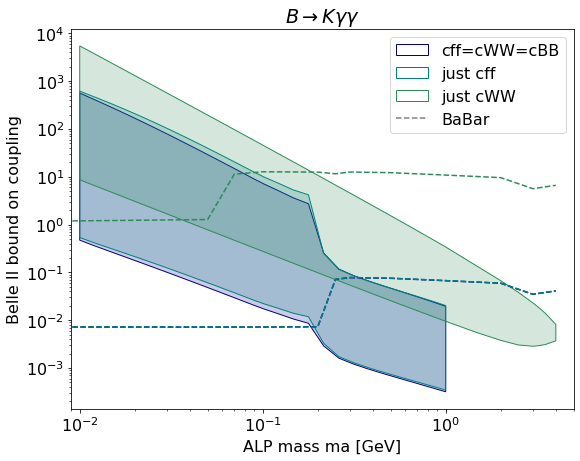

In [117]:
fig, ax = plt.subplots(figsize=(9, 7))

# ax.plot(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,5,0],label='cff=cWW=cBB',c="darkblue") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,5,1],c="darkblue") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="darkblue", ls='--')

# ax.plot(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],label='just cff',c="teal") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcff[:,5,1],c="teal") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="teal", ls='-.')

# ax.plot(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],label='just cWW',c="mediumseagreen") 
# ax.plot(masslist,readArrayVisibleBoundBelleIIcWW[:,5,1],c="mediumseagreen") 
# ax.plot(BaBarBounds[:,0],BaBarBounds[:,3],c="mediumseagreen", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,5,0],\
                    readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,5,1]),"oppacpolygon","darkblue",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,5,0],\
                    readArrayVisibleBoundBelleIIcffEqcWWEqcBB[:,5,1]),"nonfilledpolygon","darkblue",1,\
                    label='cff=cWW=cBB')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,1],c="darkblue", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"oppacpolygon","teal",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcff[:,5,0],\
                    readArrayVisibleBoundBelleIIcff[:,5,1]),"nonfilledpolygon","teal",1,\
                    label='just cff')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,2],c="teal", ls='--')

plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"oppacpolygon","seagreen",0,0.2)
plotGen(stackBounds(masslist,readArrayVisibleBoundBelleIIcWW[:,5,0],\
                    readArrayVisibleBoundBelleIIcWW[:,5,1]),"nonfilledpolygon","seagreen",1,
                    label='just cWW')
ax.plot(BaBarBounds[:,0],BaBarBounds[:,3],c="seagreen", ls='--')

ax.set_title('$B\\rightarrow K \\gamma \\gamma$')

ax.set_xlabel('ALP mass ma [GeV]')
ax.set_ylabel('Belle II bound on coupling')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(9*10**-3, 5)

handles, labels = ax.get_legend_handles_labels()
babar= mlines.Line2D([], [], color='gray', linestyle='--',
                          markersize=15, label='BaBar')
handles.append(babar) 

ax.legend(handles=handles)

plt.savefig('plots/visibleBoundBelleII-photons.png', dpi=300, bbox_inches='tight')

In [118]:
visibleBoundBelleIIcWW(0.01,5,10**3,3)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (

[8.620748230910424, 5467.003330541351]

In [119]:
visibleBoundBelleIIcWW(0.01,5,10**3,3)

<ipython-input-83-f7ef24db5db7>:38: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  nsignalAt95CLBelleIIcWWEstimate=np.vstack(([coupling,nsignalAt95CLBelleIIcWW(coupling,ma,finalStateCode,\
<ipython-input-19-de56bdf3d9c0>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  return float(gamma)
<ipython-input-58-1f1779c84ac1>:8: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return 1/(4 * (

[8.620748230910424, 5467.003330541351]

In [62]:
masslist

array([0.01      , 0.01211528, 0.01467799, 0.01778279, 0.02154435,
       0.02610157, 0.03162278, 0.03831187, 0.04641589, 0.05623413,
       0.06812921, 0.08254042, 0.1       , 0.101     , 0.12115277,
       0.14677993, 0.17782794, 0.21544347, 0.26101572, 0.31622777,
       0.38311868, 0.43      , 0.46415888, 0.47      , 0.56234133,
       0.68129207, 0.82540419, 0.95      , 1.        , 1.        ,
       1.5       , 2.        , 2.5       , 3.        , 3.2       ,
       3.5       , 4.        ])